## Data Extraction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime

import yfinance as yf

In [2]:
# For the Exploratory Data Analysis (EDA), we will focus on Apple and Nvidia stocks
stocks_list = ['AAPL','NVDA']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in stocks_list:
  globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, NVDA]
company_name = ["Apple", "NVIDA"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000,NVIDA
2024-10-16,133.979996,136.619995,131.580002,135.720001,135.720001,264879700,NVIDA
2024-10-17,139.339996,140.889999,136.869995,136.929993,136.929993,306435900,NVIDA
2024-10-18,138.669998,138.899994,137.279999,138.000000,138.000000,176090200,NVIDA
2024-10-21,138.130005,143.710007,138.000000,143.710007,143.710007,264554500,NVIDA
2024-10-22,142.910004,144.419998,141.779999,143.589996,143.589996,226311600,NVIDA
2024-10-23,142.029999,142.429993,137.460007,139.559998,139.559998,285930000,NVIDA
2024-10-24,140.820007,141.350006,138.460007,140.410004,140.410004,172354900,NVIDA
2024-10-25,140.929993,144.130005,140.800003,141.539993,141.539993,205122100,NVIDA


## Data Exploration and Discovery

In [3]:
# Summary statistics
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,61.539174,62.681481,60.308821,61.566236,61.553449,4.477522e+08
std,38.218425,38.943115,37.312915,38.147450,38.149243,1.579633e+08
min,13.043000,13.781000,12.956000,13.219000,13.206923,1.679340e+08
25%,27.840000,28.367001,27.472000,27.965000,27.951345,3.529940e+08
50%,46.667999,47.530998,46.027000,46.770000,46.755852,4.246630e+08
75%,90.405998,91.959999,89.055000,90.554001,90.538818,5.122080e+08
max,143.000000,144.419998,141.779999,143.710007,143.710007,1.543911e+09


In [4]:
# First 5 rows
NVDA.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-31,13.778,13.838,13.297,13.497,13.484670,486341000,NVIDA
2022-11-01,13.811,13.925,13.519,13.543,13.530627,432817000,NVIDA
2022-11-02,13.850,14.210,13.211,13.219,13.206923,672628000,NVIDA
2022-11-03,13.043,13.781,12.956,13.421,13.408739,500065000,NVIDA
2022-11-04,13.986,14.229,13.697,14.156,14.143067,612576000,NVIDA


In [5]:
# General info
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-10-31 to 2024-10-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Adj Close     501 non-null    float64
 5   Volume        501 non-null    int64  
 6   company_name  501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


In [6]:
# Check for missing values
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

### Time Series Visualization

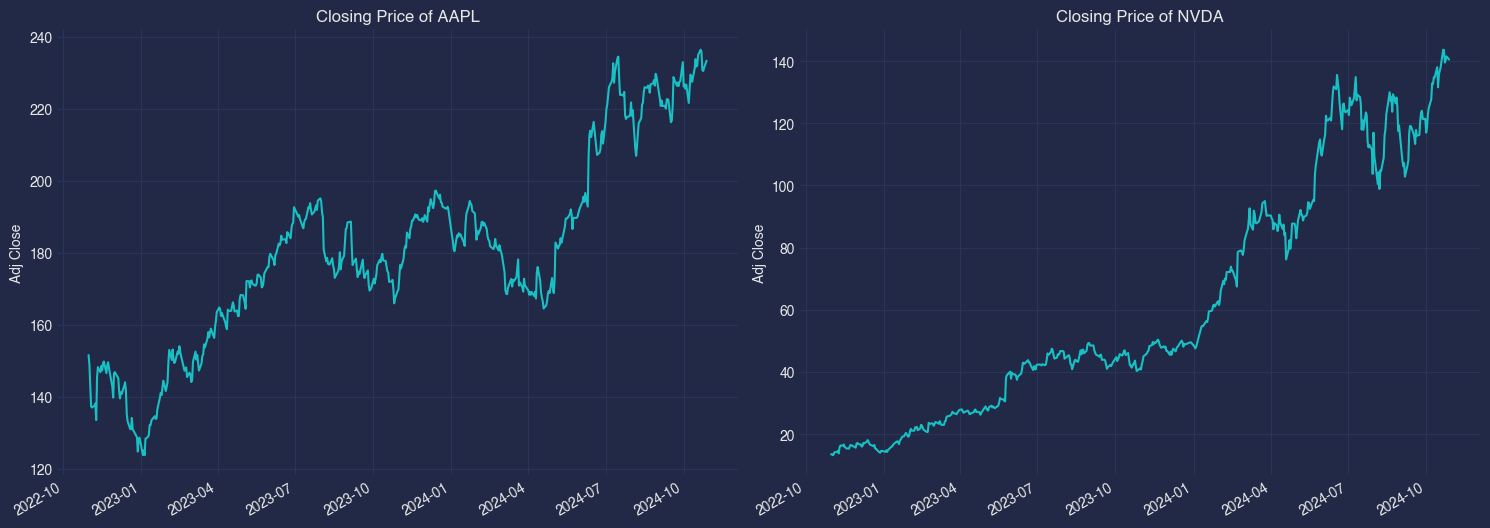

In [7]:
# Historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks_list[i - 1]}")
    plt.grid(True)
    
plt.tight_layout()

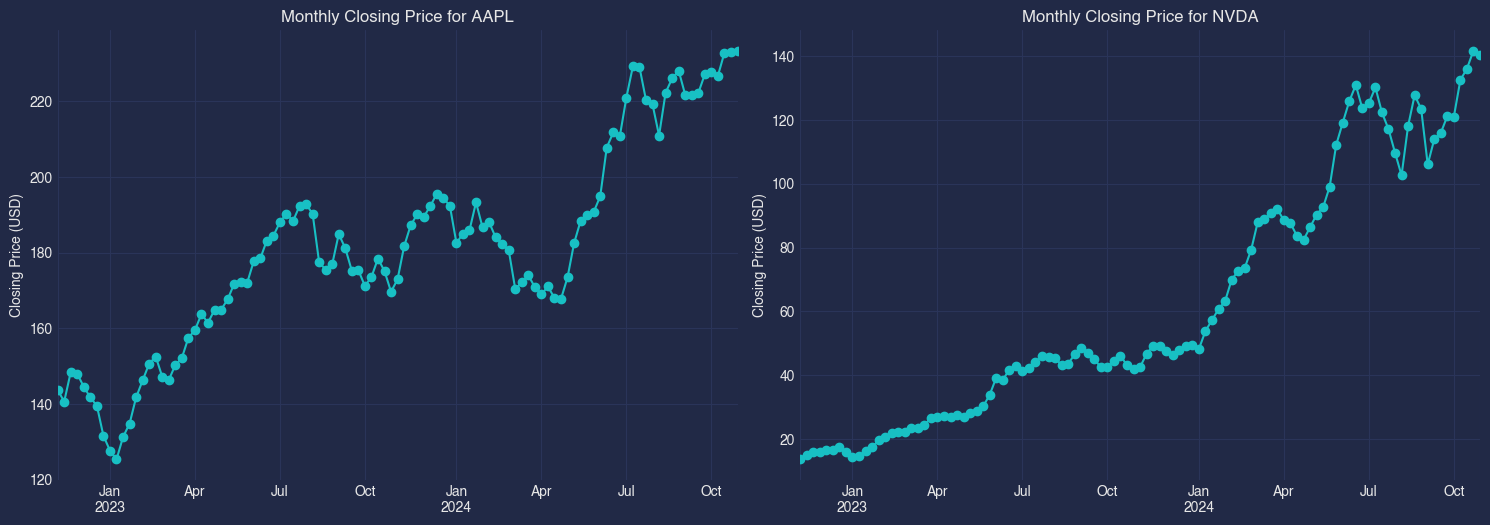

In [8]:
# Plot the closing price for each week

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    weekly_data = company['Adj Close'].resample('W').mean() # Resample the data to get weekly averages
    weekly_data.plot(marker='o', linestyle='-')
    plt.title(f'Monthly Closing Price for {stocks_list[i - 1]}')
    plt.xlabel(None)
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)

plt.tight_layout() 

In [9]:
# Plot Candlestick chart for Apple stock price to illustrate price fluctuations

fig = go.Figure(data=[go.Candlestick(x=AAPL.index,
                open=AAPL['Open'],
                high=AAPL['High'],
                low=AAPL['Low'],
                close=AAPL['Close'])])

fig.update_layout(title='Apple Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price (USD)')

fig.update_layout(template='plotly_dark')

fig.show()

In [10]:
# Plot Candlestick chart for Nvidia stock price to illustrate price fluctuations

fig = go.Figure(data=[go.Candlestick(x=NVDA.index,
                open=NVDA['Open'],
                high=NVDA['High'],
                low=NVDA['Low'],
                close=NVDA['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price (USD)')

fig.update_layout(template='plotly_dark')

fig.show()

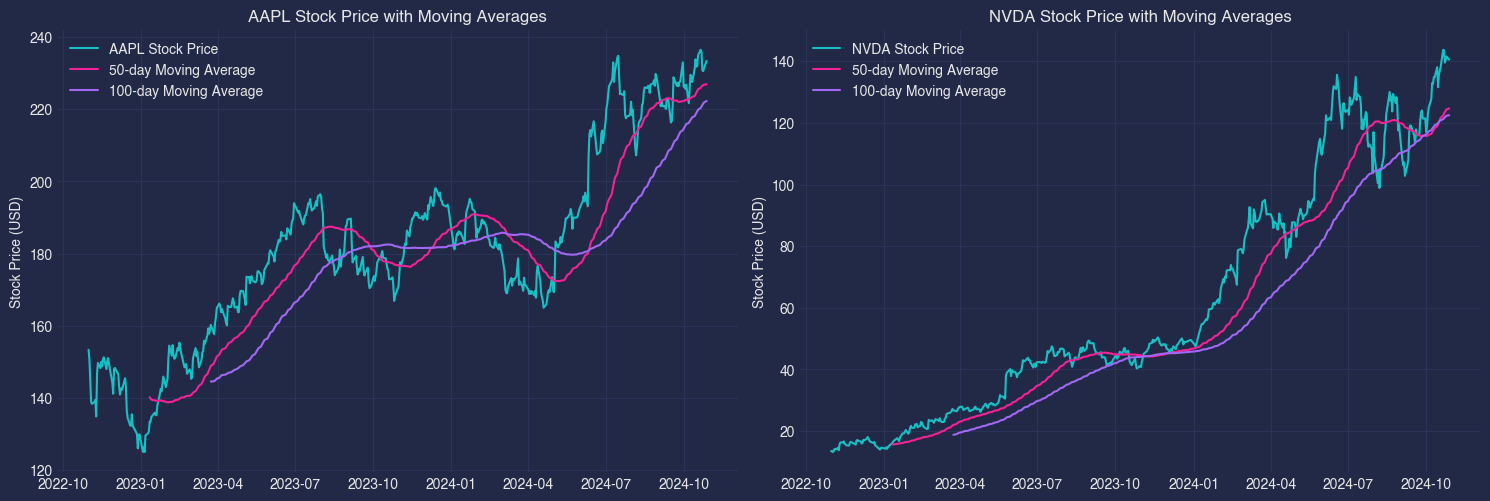

In [11]:
# Calculate and plot the Moving Average for each stock
# Moving Average: constantly updated average used to reduce noise on a price chart and provide insights into the overall price direction.
# An upward angle indicates an overall upward price movement, while a downward angle suggests a downward trend.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    company['MA50'] = company['Close'].rolling(window=50).mean()
    company['MA100'] = company['Close'].rolling(window=100).mean()

    plt.plot(company['Close'], label=f'{stocks_list[i - 1]} Stock Price')
    plt.plot(company['MA50'], label='50-day Moving Average')
    plt.plot(company['MA100'], label='100-day Moving Average')
    plt.title(f'{stocks_list[i - 1]} Stock Price with Moving Averages')
    plt.xlabel(None)
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

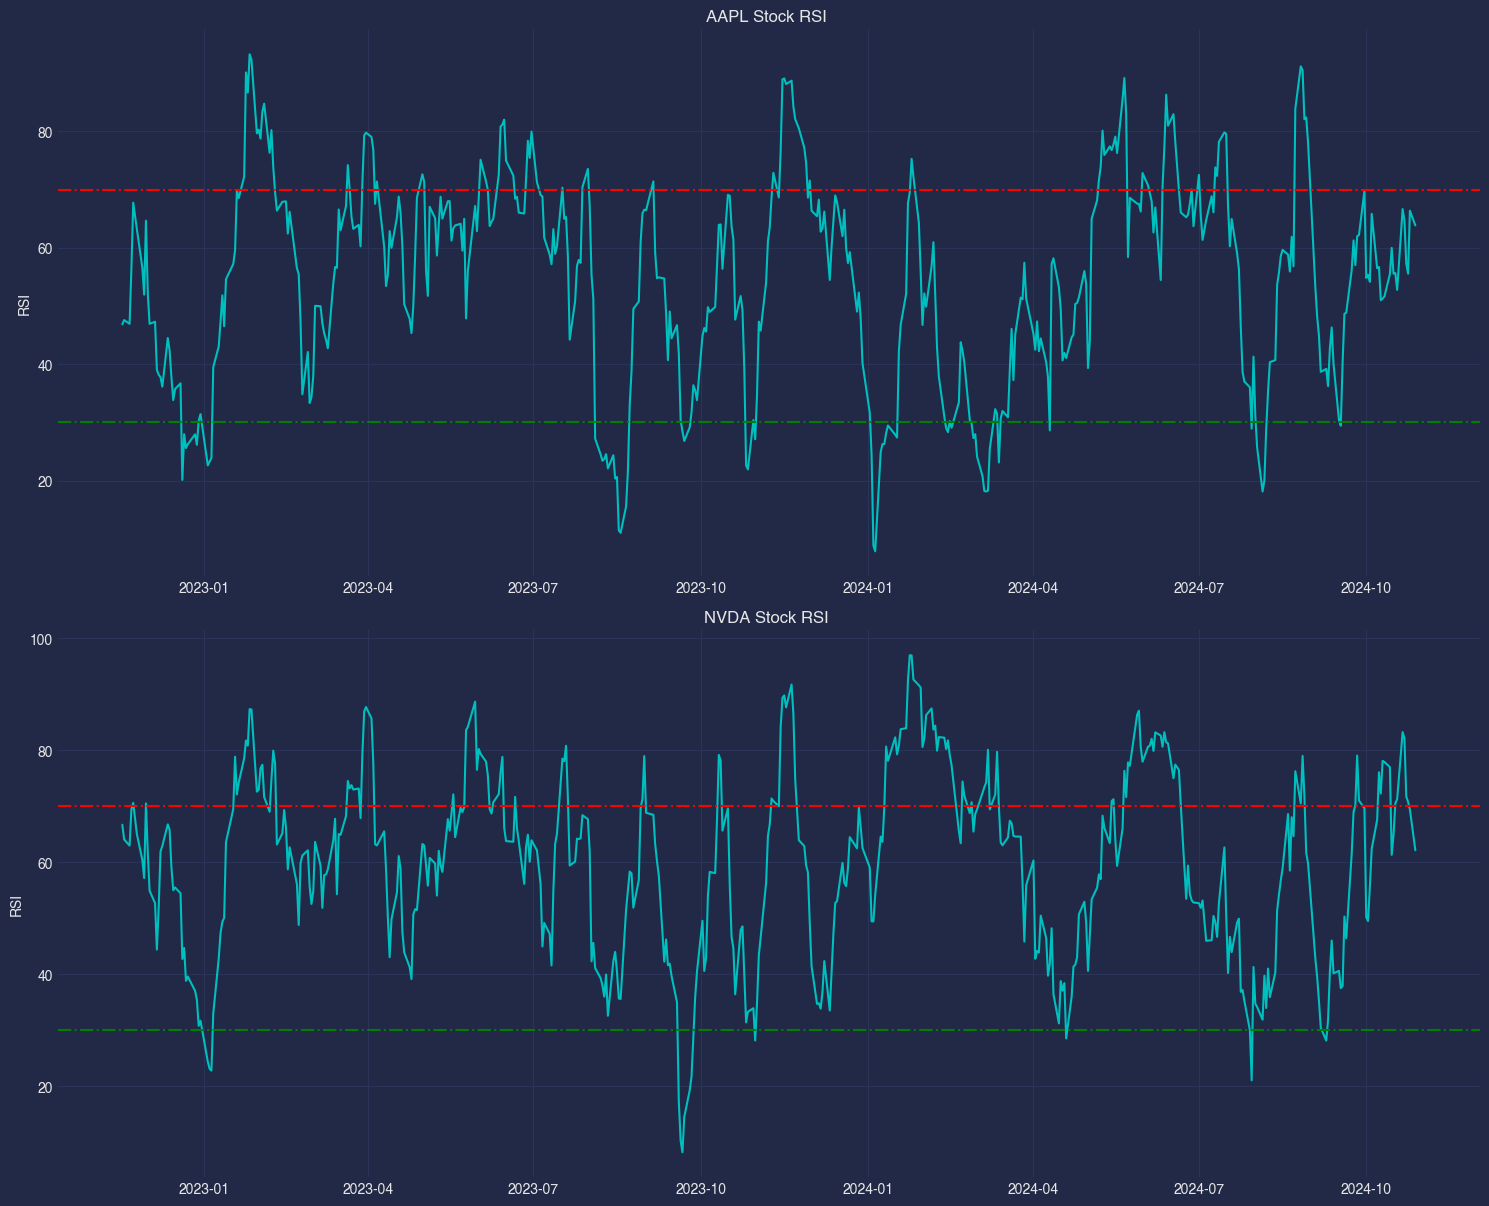

In [12]:
# Calculate and plot the Relative Strength Index (RSI) for each stock
# RSI: momentum indicator used to determine whether a security is overvalued or undervalued based on recent price changes.
# Readings above 70 indicating overbought conditions and readings below 30 indicating oversold conditions.

plt.figure(figsize=(15, 24))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)

    # Calculate daily price change
    company['Daily Change'] = company['Close'].diff()

    # the lookback period for RSI
    period = 14    # a lookback period of 14 is a common choice for calculating the RSI

    # Calculate the average gain and average loss
    company['Gain'] = company['Daily Change'].apply(lambda x: x if x > 0 else 0)
    company['Loss'] = company['Daily Change'].apply(lambda x: -x if x< 0 else 0)
    company['Average Gain'] = company['Gain'].rolling(window=period).mean()
    company['Average Loss'] = company['Loss'].rolling(window=period).mean()

    # Calculate the relative strength  (RS)
    company['RS'] = company['Average Gain'] / company['Average Loss']

    # Calculate the RSI
    company['RSI'] = 100 - (100 / (1 + company['RS']))

    # Plotting the RSI
    plt.plot(company.index, company['RSI'], label=f'{stocks_list[i - 1]} RSI', color='c')
    plt.axhline(y=70, color='r', linestyle='dashdot')
    plt.axhline(y=30, color='g', linestyle='dashdot')
    plt.title(f'{stocks_list[i - 1]} Stock RSI ')
    plt.xlabel(None)
    plt.ylabel('RSI')

plt.tight_layout()
plt.show()

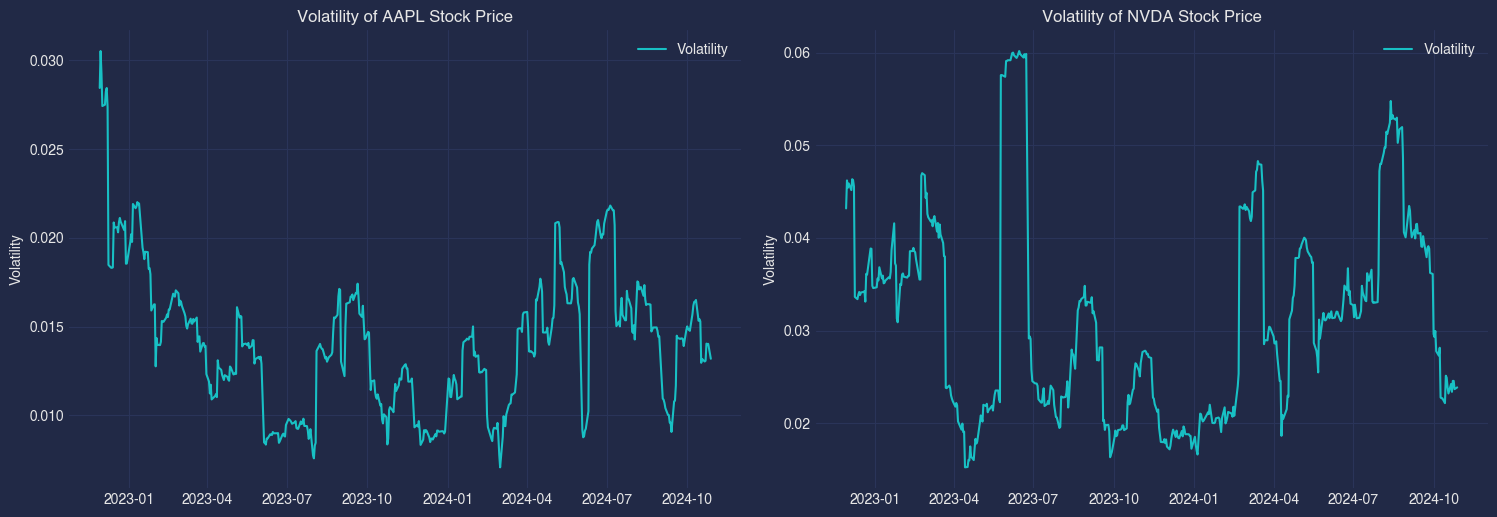

In [13]:
# Plot a short-term volatility chart for each stock
# Volatility: measure of price fluctuation using the speed and magnitude of price movements to indicate how much a stock or market index can change.
# Higher volatility implies greater risk, as prices may experience significant swings.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volatility'] = company['Close'].pct_change().rolling(window=20).std()
    plt.plot(company['Volatility'], label='Volatility')
    plt.title(f'Volatility of {stocks_list[i - 1]} Stock Price')
    plt.xlabel(None)
    plt.ylabel('Volatility')
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()

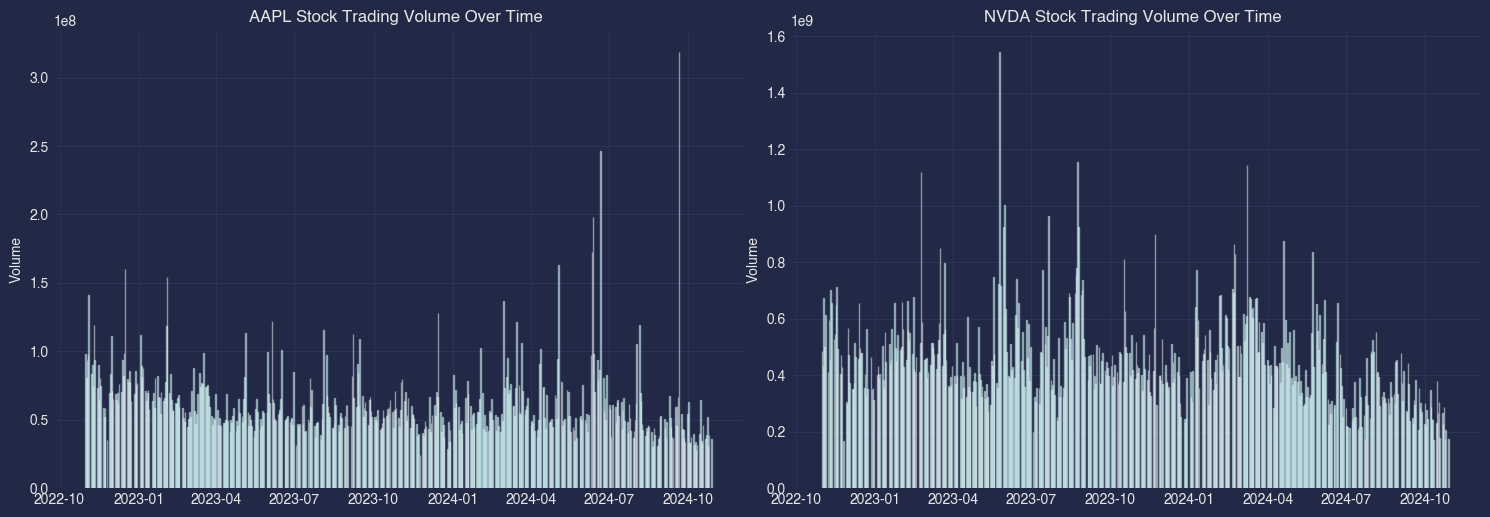

In [14]:
# Plot trading volume over time for each stock
# Trading volume: the number of shares or contracts traded for a specific security for a specific time period.
# Conveys valuable information about investors' sentiments regarding a market or security.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.bar(company.index, company['Volume'], color='c', alpha=0.5)
    plt.title(f'{stocks_list[i - 1]} Stock Trading Volume Over Time ')
    plt.xlabel(None)
    plt.ylabel('Volume')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# Correlation Analysis with S&P 500
# Determines how much the overall state of the market influences a particular stock. High positive correlation indicates sensitivity to overall market trends.

# Download S&P 500 data
sp500_data = yf.download('^GSPC', start=start, end=end)

# Create a DataFrame to store correlation values
correlation_data = []

for i, company in enumerate(company_list, 1):
    correlation = company['Close'].corr(sp500_data['Close'])
    correlation_data.append({'Company': stocks_list[i - 1], 'Correlation': correlation})
    print(f"'Company : {stocks_list[i - 1]} Correlation: {correlation}")

[*********************100%%**********************]  1 of 1 completed

'Company : AAPL Correlation: 0.8603145552201649
'Company : NVDA Correlation: 0.9798473381162974


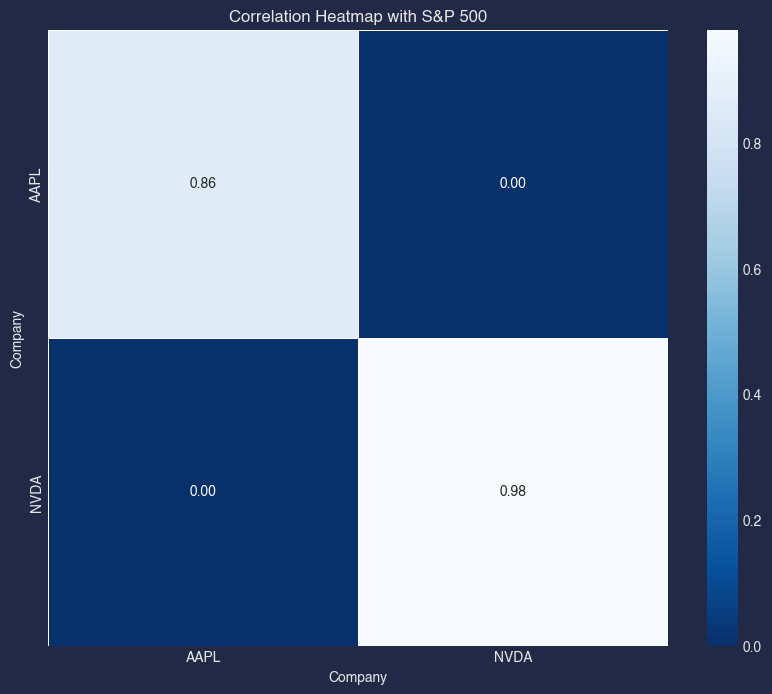

In [16]:
# Heatmap
# A positive correlation indicates that the stock moves in the same direction as the S&P 500, whereas a negative correlation indicates the opposite.

correlation_df = pd.DataFrame(correlation_data)
heatmap_data = correlation_df.pivot_table(index='Company', columns='Company', values='Correlation', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Blues_r', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with S&P 500')
plt.show()

### Performance Analysis

In [17]:
# Sharpe Ratio: assess the relationship between an investment's return and its risk by comparing the excess return of an investment
# to a benchmark with the volatility of those returns. A higher Sharpe ratio indicates better risk-adjusted performance.

sharpe_ratios = []
stock_names = []

# Calculate Sharpe Ratio for each company
for i, company in enumerate(company_list, 1):
    company['Daily Returns'] = company['Close'].pct_change()
    sharpe_ratio = np.sqrt(252) * (company['Daily Returns'].mean() / company['Daily Returns'].std())
    print(f"Sharpe Ratio for {stocks_list[i - 1]}: {sharpe_ratio}")
    sharpe_ratios.append(sharpe_ratio)
    stock_names.append(stocks_list[i - 1])

Sharpe Ratio for AAPL: 1.0045162235898168
Sharpe Ratio for NVDA: 2.502438924366098


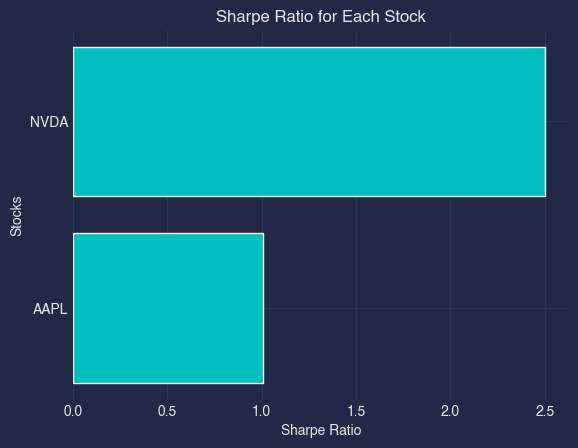

In [18]:
plt.barh(stock_names, sharpe_ratios, color='c')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Stocks')
plt.title('Sharpe Ratio for Each Stock')
plt.show()

### Case Study: NVIDIA Stock Prices

[*********************100%%**********************]  1 of 1 completed


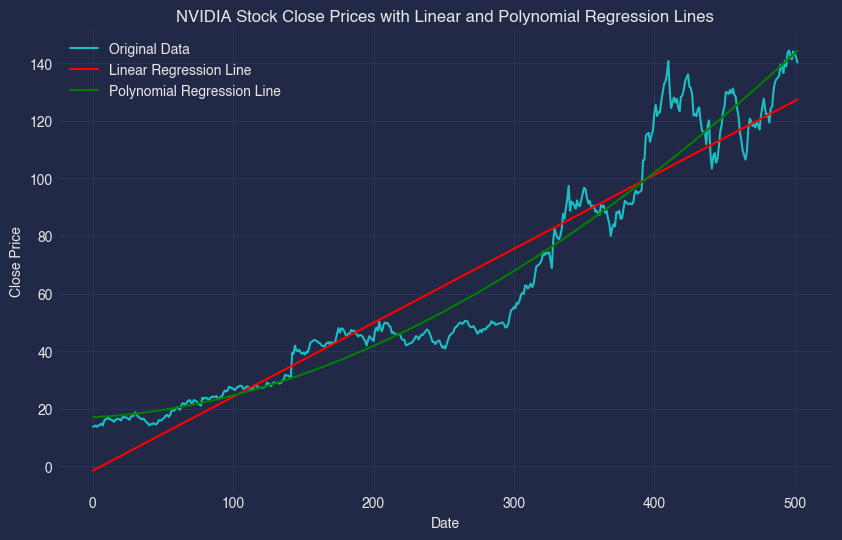

R-squared value (Linear): 0.9069414345593212
R-squared value (Polynomial): 0.9485174857169658


In [5]:
# Determine if the dataset for Nvidia closing stock prices from the past 2 years
# is linear or nonlinear

# Define the stock list
stocks_list = ['NVDA']

# Define the date range
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# Download stock data
for stock in stocks_list:
    globals()[stock] = yf.download(stock, start, end)

# Reset the index and rename columns
NVDA.reset_index(inplace=True)
NVDA.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Create a new data frame with only the 'Close' column
nvidia_data = NVDA[['Close']]

# Drop rows where 'Close' is NaN
nvidia_data = nvidia_data.dropna()

# Extract the 'Close' prices and reshape for the regression model
X = np.arange(len(nvidia_data)).reshape(-1, 1)
y = nvidia_data['Close'].values

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict using the linear model
y_pred_linear = linear_model.predict(X)

# Fit the polynomial regression model
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict using the polynomial model
y_pred_poly = poly_model.predict(X_poly)

# Plot the original 'Close' prices and both regression lines
plt.figure(figsize=(10, 6))
plt.plot(nvidia_data.index, y, label='Original Data')
plt.plot(nvidia_data.index, y_pred_linear, color='red', label='Linear Regression Line')
plt.plot(nvidia_data.index, y_pred_poly, color='green', label='Polynomial Regression Line')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NVIDIA Stock Close Prices with Linear and Polynomial Regression Lines')
plt.legend()
plt.show()

# Calculate and print the R-squared values
r_squared_linear = linear_model.score(X, y)
r_squared_poly = poly_model.score(X_poly, y)
print(f'R-squared value (Linear): {r_squared_linear}')
print(f'R-squared value (Polynomial): {r_squared_poly}')

The r-squared value using a Linear Regression model is 0.9069, which indicates that the linear model explains approximately 90.69% of the variance in the data. Comparatively, the r-squared value using a Polynomial Regression is 0.9485, which indicates that the polynomial model explains approximately 94.85% of the variance in the data. Because this value is higher than that of the linear model, we can conclude that the nonlinear polynomial model does a better job of capturing the underlying patters in the data, which means that the dataset is likely nonlinear.